In [1]:
!pip install networkx PyTDC rdkit pysmiles
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.13.0+cpu.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.7/100.7 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 KB 14.7 MB/s eta 0:00:00
  Created wheel for PyTDC: filename=PyTDC-0.3.8-py3-none-any.whl size=136139 sha256=0e13ff7054304698393e4cf419ed5035ea3077b8d0b0dfb4a3cccec059621344
  Stored in directory: /root/.cache/pip/wheels/4a/4f/da/b494dde823e311675b3ce778ca8c22e734ef8f779dbf311805
Successfully built PyTDC
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 KB 10.6 MB/s eta 0:00:00
     ━━━━━

In [ ]:
!nvidia-smi

Tue Jan  3 19:22:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip show torch

Name: torch
Version: 1.13.0+cu116
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.8/dist-packages
Requires: typing-extensions
Required-by: torchvision, torchtext, torchaudio, fastai


In [2]:
from tdc.single_pred import ADME
from pysmiles import read_smiles
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.data import Data
import numpy as np
import pandas as pd
import typing

import torch
from torch.utils import data 
from torch import nn
from torch.nn import functional as F

#--------------
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools

from IPython.core.display import display, HTML
from IPython.core.debugger import set_trace  # for debugging
import tabulate
import altair as alt

In [3]:
!pip install pytorch-ignite DeepPurpose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.1/264.1 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 KB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 KB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.7/730.7 KB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.8/245.8 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 KB 9.6 MB/s eta 0:00:00
  Preparing 

In [4]:
!pip install git+https://github.com/bp-kelley/descriptastorus
!pip install pandas-flavor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/bp-kelley/descriptastorus to /tmp/pip-req-build-rmp7ncvq
  Running command git clone --filter=blob:none --quiet https://github.com/bp-kelley/descriptastorus /tmp/pip-req-build-rmp7ncvq
  Resolved https://github.com/bp-kelley/descriptastorus to commit 86eedc60546abe6f59cdbcb12025a61157ba178d
  Preparing metadata (setup.py) ... done
  Created wheel for descriptastorus: filename=descriptastorus-2.5.0.20-py3-none-any.whl size=1083449 sha256=acf57b2b039897eb063cd579f188a48b994c7f102ce6c01c44149a3862a4f0e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-stsrfnzc/wheels/45/d6/37/fe624913d6e54388bccce05360ccd443eeb01defda346642c2
Successfully built descriptastorus
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import ss_utils
from DeepPurpose import utils, CompoundPred
from tdc.single_pred import ADME
import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

In [35]:
data_whole = ADME(name = 'Bioavailability_Ma')
# data_whole = ADME(name = 'HIA_Hou')

Found local copy...
Loading...
Done!


In [7]:
# data = ADME(name = 'HIA_Hou').get_data(format = 'dict')
# X, y = data['Drug'], data['Y']

Downloading...
100%|██████████| 40.1k/40.1k [00:00<00:00, 2.15MiB/s]
Loading...
Done!


In [140]:
X, y = ADME(name = 'Bioavailability_Ma').get_data(format = 'DeepPurpose')

Found local copy...
Loading...
Done!


In [9]:
drug_encoding_name = 'Transformer' #'Transformer'   'MPNN'
train, val, test = utils.data_process(X_drug = X,
                                      y = y, 
                                      drug_encoding = drug_encoding_name,
                                      # target_encoding = drug_encoding_name,
                                      random_seed = 'TDC')

Drug Property Prediction Mode...
in total: 578 drugs
encoding drug...
unique drugs: 578
Done.


In [10]:
train.head()

,SMILES,Label,drug_encoding
0,CC(=O)Nc1ccccc1,1,"([184, 201, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1,"([184, 1000, 22, 763, 1049, 640, 0, 0, 0, 0, 0..."
2,C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H...,1,"([43, 955, 315, 150, 142, 643, 103, 1013, 525,..."
3,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C,1,"([218, 343, 107, 71, 236, 567, 35, 265, 804, 0..."
4,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...,1,"([271, 94, 452, 367, 1339, 1133, 458, 697, 579..."


In [41]:
len(train['drug_encoding'][120][0])

50

In [11]:
config = utils.generate_config(drug_encoding = drug_encoding_name, 
                        #  target_encoding = drug_encoding_name, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256
                        )

In [12]:
#model = models.model_initialize(**config)
model = CompoundPred.model_initialize(**config)
model

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68724. Total time 0.00083 hours
Validation at Epoch 1 , AUROC: 0.68627 , AUPRC: 0.88238 , F1: 0.93577
Training at Epoch 2 iteration 0 with loss 0.43694. Total time 0.00083 hours
Validation at Epoch 2 , AUROC: 0.48179 , AUPRC: 0.86735 , F1: 0.93577
Training at Epoch 3 iteration 0 with loss 0.42101. Total time 0.00083 hours
Validation at Epoch 3 , AUROC: 0.52100 , AUPRC: 0.88877 , F1: 0.93577
Training at Epoch 4 iteration 0 with loss 0.40649. Total time 0.00111 hours
Validation at Epoch 4 , AUROC: 0.78991 , AUPRC: 0.96441 , F1: 0.93577
Training at Epoch 5 iteration 0 with loss 0.41946. Total time 0.00111 hours
Validation at Epoch 5 , AUROC: 0.59943 , AUPRC: 0.93182 , F1: 0.93577
Training at Epoch 6 iteration 0 with loss 0.42961. Total time 0.00111 hours
Validation at Epoch 6 , AUROC: 0.55182 , AUPRC: 0.91585 , F1: 0.93577
Training at Epoch 7 iteration 0 with loss 0.42853. Total t

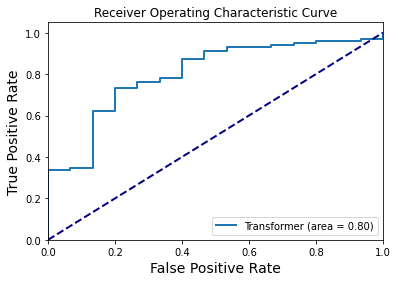

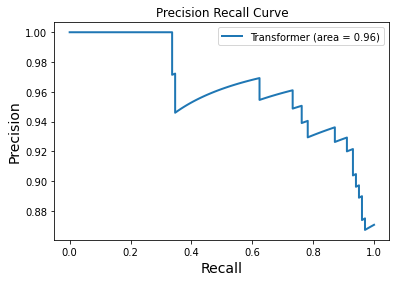

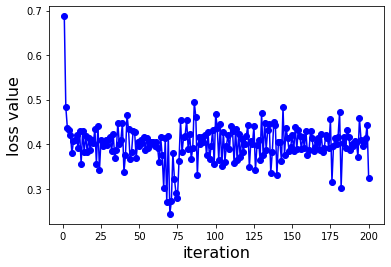

In [13]:
model.train(train, val, test)

In [36]:
split_whole = data_whole.get_split()

In [37]:
split_whole.keys()

dict_keys(['train', 'valid', 'test'])

In [38]:
train_set = split_whole['train']
valid_set = split_whole['valid']
test_set = split_whole['test']
len(train_set), len(valid_set), len(test_set)

(448, 64, 128)

In [39]:
train_set.head(20)

,Drug_ID,Drug,Y
0,Dimercaprol,OCC(S)CS,0
1,Edrophonium,CC[N+](C)(C)c1cccc(O)c1,0
2,Vidarabine,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@@H]1O,0
3,Cefacetrile,CC(=O)OCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)CC#N)[...,0
4,Ticarcillin,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](C(=O)O)c3ccsc3...,0
5,Cefoxitin,CO[C@@]1(NC(=O)Cc2cccs2)C(=O)N2C(C(=O)O)=C(COC...,0
6,Ceftazidime,CC(C)(O/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=...,0
7,Arbekacin,NCC[C@H](O)C(=O)N[C@@H]1C[C@H](N)[C@@H](O[C@H]...,0
8,Ceftriaxone,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(CSc3nc...,0
9,Epirubicin,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,0


In [40]:
train_set.columns

Index(['Drug_ID', 'Drug', 'Y'], dtype='object')

In [41]:
whole_df = pd.concat([train_set, valid_set, test_set], ignore_index=True)
whole_df.reset_index()
whole_df.head()

,Drug_ID,Drug,Y
0,Dimercaprol,OCC(S)CS,0
1,Edrophonium,CC[N+](C)(C)c1cccc(O)c1,0
2,Vidarabine,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@@H]1O,0
3,Cefacetrile,CC(=O)OCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)CC#N)[...,0
4,Ticarcillin,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](C(=O)O)c3ccsc3...,0


In [42]:
len(whole_df)

640

In [43]:
test_1_s = train_set.iloc[80]['Drug']
test_1_s

'COc1ccc2c3c1O[C@H]1[C@@H](O)CC[C@H]4[C@@H](C2)N(C)CC[C@]314'

In [44]:
len(test_1_s)

59

In [45]:
mol = read_smiles(test_1_s)
mol

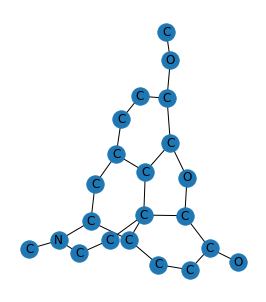

In [47]:
# To print Smiles
elements = nx.get_node_attributes(mol, name = "element")
nx.draw(mol, with_labels=True, labels = elements, pos=nx.spring_layout(mol))
plt.gca().set_aspect('equal')

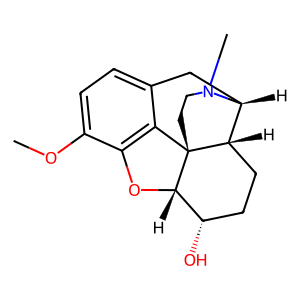

In [48]:
# Just for visualisation
test_mol = Chem.MolFromSmiles(test_1_s)
Draw.MolToImage(test_mol)

In [49]:
print(Chem.MolToSmiles(test_mol, allHsExplicit=True))

[CH3][O][c]1[cH][cH][c]2[c]3[c]1[O][C@H]1[C@@H]([OH])[CH2][CH2][C@H]4[C@@H]([CH2]2)[N]([CH3])[CH2][CH2][C@@]341


In [50]:
# adjacency matrix
am_test1 = nx.to_numpy_matrix(mol, weight='order')

In [ ]:
am_test1

In [52]:
# Check what all molecules are present in all the smiles? C, N, O only?

ele_dict = {}
for i in range(train_set.shape[0]):
    temp_ = train_set.iloc[i]['Drug']
    for c in temp_:
        if c not in ["@", "[", "]", "1", "2", "3", "4", "5", "6", "7", "8", "9", "\\", "/", "#", "-", "+", "=", "(", ")", "."]:
            c = c.upper()
            if c in ele_dict:
                ele_dict[c] += 1
            else:
                ele_dict[c] = 1
                
ele_dict

{'O': 1518,
 'C': 8077,
 'S': 132,
 'N': 1055,
 'H': 805,
 'P': 7,
 'L': 92,
 'F': 82,
 'B': 5,
 'R': 5,
 'A': 1,
 'U': 1,
 'I': 2}

In [53]:
train_set.iloc[3]['Drug']

'CC(=O)OCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)CC#N)[C@H]2SC1'

In [54]:
class SymbolFeaturizer:
    """
    Symbol featurizer takes in a symbol and returns an array representing its
    one-hot encoding.
    """
    def __init__(self, symbols, feature_size=None):
        self.atm2indx = {k:i for i, k in enumerate(symbols)}
        self.indx2atm = {v:k for k,v in self.atm2indx.items()}
        self.feature_size = feature_size if feature_size is not None else len(symbols)
    
    def __call__(self, atom_symbol):
        out = np.zeros(self.feature_size)
        out[self.atm2indx[atom_symbol]] = 1.
        return out

    
atm_featurizer = SymbolFeaturizer(['C', 'N', 'O'])
node_features = [atm_featurizer(atm.GetSymbol()) for atm in test_mol.GetAtoms()]
node_features = np.array(node_features)
print(f"Node features:\n {node_features}")


# Compute the adjacency matrix for paracetemol from rdkit 
num_nodes = test_mol.GetNumAtoms()
adj_mat = np.zeros((num_nodes, num_nodes))

for bnd in test_mol.GetBonds():
    adj_mat[bnd.GetBeginAtomIdx(), bnd.GetEndAtomIdx()] = bnd.GetBondTypeAsDouble()  
    adj_mat[bnd.GetEndAtomIdx(), bnd.GetBeginAtomIdx()] = bnd.GetBondTypeAsDouble()

print(f"\n\nAdjacency matrix:\n {adj_mat}")

Node features:
 [[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


Adjacency matrix:
 [[0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. ]
 [1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. ]
 [0.  1.  0.  1.5 0.  0.  0.  1.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. ]
 [0.  0.  1.5 0.  1.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. ]
 [0.  0.  0.  1.5 0.  1.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.5 0.  1.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.5 0.  1.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1. ]
 [0.  0.  1.5 0.  0.  0.  1.5 0.  1.  0.  0.  0.  0.  

In [55]:
def mol_to_edge_list_graph(mol: Chem.Mol, atm_featurizer: SymbolFeaturizer) -> typing.Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Function that takes in a RDKit molecule (of N atoms, E bonds) and returns three numpy arrays:
    * the node features array (of dtype np.float32, shape [N, d]), which is a one hot encoding 
    of the element of each atom type.
    * the edge list (of dtype np.int32, shape [2E, 2]) that represents the start and end index
    of each edge.
    * the edge feature list (of dtype np.float32, shape [2E, 1]) which describes the feature type
    associated with each edge.
    """
    # Node features
    node_features = [atm_featurizer(atm.GetSymbol()) for atm in mol.GetAtoms()]
    node_features = np.array(node_features, dtype=np.float32)
    
    # Edge list and edge feature list
    edge_list = []
    edge_feature_list = []
    for bnd in mol.GetBonds():
        bnd_indices = [bnd.GetBeginAtomIdx(), bnd.GetEndAtomIdx()]
        bnd_type = bnd.GetBondTypeAsDouble()
        edge_list.extend([bnd_indices,  bnd_indices[::-1]])
        edge_feature_list.extend([bnd_type, bnd_type])
    edge_list = np.array(edge_list, dtype=np.int32)
    edge_feature_list = np.array(edge_feature_list, dtype=np.float32)
    
    return node_features, edge_list, edge_feature_list
    

node_features, edge_list, edge_feature_list = mol_to_edge_list_graph(test_mol, atm_featurizer)
print(f"Node feature list:\n{node_features}")
print(f"\nEdge list:\n{edge_list}")
print(f"\nEdge feature list:\n{edge_feature_list}")

Node feature list:
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

Edge list:
[[ 0  1]
 [ 1  0]
 [ 1  2]
 [ 2  1]
 [ 2  3]
 [ 3  2]
 [ 3  4]
 [ 4  3]
 [ 4  5]
 [ 5  4]
 [ 5  6]
 [ 6  5]
 [ 6  7]
 [ 7  6]
 [ 7  8]
 [ 8  7]
 [ 8  9]
 [ 9  8]
 [ 9 10]
 [10  9]
 [10 11]
 [11 10]
 [10 12]
 [12 10]
 [12 13]
 [13 12]
 [13 14]
 [14 13]
 [14 15]
 [15 14]
 [15 16]
 [16 15]
 [15 17]
 [17 15]
 [17 18]
 [18 17]
 [17 19]
 [19 17]
 [19 20]
 [20 19]
 [20 21]
 [21 20]
 [ 7  2]
 [ 2  7]
 [21  9]
 [ 9 21]
 [16  5]
 [ 5 16]
 [21  6]
 [ 6 21]
 [21 14]
 [14 21]]

Edge feature list:
[1.  1.  1.  1.  1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.5 1.5 1.  1.  1.  1.  1.  1.  1.  1. ]


In [56]:
class Graphs:
    ATOM_FEATURIZER = SymbolFeaturizer(['Ag', 'Al', 'Ar', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C',
                    'Ca', 'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Eu', 'F',
                    'Fe', 'Ga', 'Ge', 'H', 'He', 'Hf', 'Hg', 'I', 'In', 'Ir', 'K', 'La',
                    'Li', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nd', 'Ni', 'O', 'Os', 'P', 'Pb',
                    'Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se',
                    'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Te', 'Ti', 'Tl', 'V', 'W', 'Xe', 'Y',
                    'Yb', 'Zn', 'Zr'])
    # ^ you can change the number of symbols here to play with the dimensionality,
    # we only need to have the symbols: ['Br', 'C', 'Cl', 'F', 'I', 'N', 'O', 'P', 'S']

    BOND_FEATURIZER = SymbolFeaturizer([1., 1.5, 2., 3.])  
    # ^ single, aromatic, double and triple bonds (see earlier how RDKit represents these as doubles.)
    
    def __init__(self, node_features: torch.Tensor, 
                 edge_list: torch.Tensor, edge_features: torch.Tensor, node_to_graph_id: torch.Tensor):
        self.node_features = node_features
        self.edge_list = edge_list
        self.edge_features = edge_features
        self.node_to_graph_id = node_to_graph_id
        
    def to(self, *args, **kwargs):
        new_graph = type(self)(self.node_features.to(*args, **kwargs),
                               self.edge_list.to(*args, **kwargs),
                               self.edge_features.to(*args, **kwargs),
                               self.node_to_graph_id.to(*args, **kwargs)
                              )
        return new_graph
    
    @classmethod
    def from_smiles_string(cls, smiles_str: str):
        # Convert to form we need using previous code:
        mol = Chem.MolFromSmiles(smiles_str)
        node_features, edge_list, edge_features = mol_to_edge_list_graph(mol, cls.ATOM_FEATURIZER)
        edge_features = [cls.BOND_FEATURIZER(elem) for elem in edge_features]
        # ^ nb here we're converting the edge feature list into one-hot form
        
        # Convert to tensors:
        node_features = torch.tensor(node_features, dtype=torch.float32)
        edge_list = torch.tensor(edge_list, dtype=torch.int64)
        edge_features = torch.tensor(edge_features, dtype=torch.float32)
        node_to_graph_id = torch.zeros(node_features.shape[0], dtype=torch.int64)
        # ^we only (currently) have one molecule per SMILES so all the nodes can be assigned 
        # the same id
        
        return cls(node_features, edge_list, edge_features, node_to_graph_id)
    
    @property
    def num_graphs(self):
        return torch.unique(self.node_to_graph_id).shape[0]
    
    @classmethod
    def concatenate(cls, list_of_graphs):
        # node features and edge_features simply get concatenated
        new_node_features = torch.cat([e.node_features for e in list_of_graphs], dim=0)
        new_edge_features = torch.cat([e.edge_features for e in list_of_graphs], dim=0)
        
        # edge_list and node
        new_edge_lists = []
        new_node_ids = []
        num_nodes_seen_so_far = 0
        num_graphs_so_far = 0
        for graph in list_of_graphs:
            new_edge_lists.append(graph.edge_list + num_nodes_seen_so_far)
            # ^ shift up the edges to reflect the nodes new indices
            
            new_node_ids.append(graph.node_to_graph_id + num_graphs_so_far)
            # ^shift up the node to graph id to reflect the number of graphs before
            
            num_nodes_seen_so_far += graph.node_features.shape[0]
            num_graphs_so_far +=  torch.unique(graph.node_to_graph_id).shape[0]
        
        new_edge_lists = torch.cat(new_edge_lists, dim=0)
        new_new_node_ids = torch.cat(new_node_ids, dim=0)
        
        new_concatenated_graph = cls(node_features=new_node_features,
                                     edge_list=new_edge_lists,
                                     edge_features=new_edge_features,
                                     node_to_graph_id=new_new_node_ids)
        return new_concatenated_graph
    
    
# We're now going to create an instance of this class and test the concatenate function
# (you could also write a reverse function if you wanted to be sure your code worked correctly)
# acetone_g = Graphs.from_smiles_string('CC(=O)C')
# ethane_g = Graphs.from_smiles_string('CC')        
    
# graph_of_both = Graphs.concatenate([acetone_g, ethane_g])
# print(f"graph_of_both.node_features:\n{graph_of_both.node_features}\n\n")
# print(f"graph_of_both.edge_list:\n{graph_of_both.edge_list}\n\n")
# print(f"graph_of_both.edge_features:\n{graph_of_both.edge_features}\n\n")
# print(f"graph_of_both.node_to_graph_id:\n{graph_of_both.node_to_graph_id}\n\n")

In [57]:
class GNN(nn.Module):
    def __init__(self, node_feature_dimension, num_propagation_steps:int =4):
        super().__init__()
        
        self.num_propagation_steps = num_propagation_steps
        # called T above.
        
        # Our sub modules:
        self.message_projection = nn.Linear(node_feature_dimension, node_feature_dimension, bias=False)
        self.update_gru = nn.GRUCell(input_size=node_feature_dimension,
                                     hidden_size=node_feature_dimension, bias=True)
        self.attn_net = nn.Linear(node_feature_dimension, 1)
        self.proj_net = nn.Linear(node_feature_dimension, node_feature_dimension)
        self.final_lin = nn.Linear(node_feature_dimension, 1)
        
    def forward(self, graphs_in: Graphs):
        """
        Produces a column vector of predictions, with each element in this vector a prediction
        for each marked graph in `graphs_in`.
        
        In the comments below N is the number of nodes in graph_in (across all graphs), 
        d the feature dimension, and G is the number of individual molecular graphs.        
        """
        # 1. Message passing and updating
        m = graphs_in.node_features  # shape: [N, d]
        
        for t in range(self.num_propagation_steps):
            projs = self.message_projection(m)  # [N, d]
            
            # Update the node embeddings (eqn 1 above)
            # 1a. compute the sum for each node
            msgs = torch.zeros_like(m)  # [N, d]
            msgs.index_add_(0, graphs_in.edge_list[:, 0], projs.index_select(0, graphs_in.edge_list[:, 1]))
            
            # 1b. update the embeddings via GRU cell
            m = self.update_gru(msgs, m)  # [N, d]
            
            
        # 2. Aggregation (eqn 2 above)
        # a compute weighted embeddings
        attn_coeffs = torch.sigmoid(self.attn_net(m))  # [N, 1]
        proj_embeddings = self.proj_net(m)  # [N, d']
        weighted_embeddings = attn_coeffs * proj_embeddings
        
        # perform the sum
        graph_embedding = torch.zeros(graphs_in.num_graphs, weighted_embeddings.shape[1],
                                 device=m.device, dtype=m.dtype)  
        graph_embedding.index_add_(0, graphs_in.node_to_graph_id, weighted_embeddings)  # [G, d']
        
        # 3. Final linear projection.
        final_prediction = self.final_lin(graph_embedding)  # [G, 1]
        return final_prediction
    
    
gnn = GNN(len(Graphs.ATOM_FEATURIZER.indx2atm))

In [58]:
def collate_for_graphs(batch):
    """
    This is a custom collate function for use minibatches of graphs along with their value.
    It ensures that we concatenate graphs correctly.
    """
    # Split up the graphs and the y values
    list_of_graphs, list_of_targets = zip(*batch)
    list_of_graphs = list(list_of_graphs)
    list_of_targets = list(list_of_targets)
    
    # The graphs need to be concatenated (i.e. collated) using the function you wrote
    graphs = Graphs.concatenate(list_of_graphs)
    
    # The y values can use the default collate function as before.
    targets = data.dataloader.default_collate(list_of_targets)
    
    return graphs, targets

In [60]:
# Then we train and evaluate
out = ss_utils.train_neural_network(train_set, valid_set, "Drug", "Y",
                                    transform=Graphs.from_smiles_string, neural_network=gnn,
                                   collate_func=collate_for_graphs)

# And then we print out as a table some of the results.
display(HTML(tabulate.tabulate(out['out_table'], tablefmt="html"))) 

Train dataset is of size 448 and valid of size 64
Epoch - 0
Training Results - Epoch: 0  Avg loss: 0.96
Validation Results - Epoch: 0 Avg loss: 0.96


[1/7]  14%|#4         [00:00<?]

Epoch - 1
Training Results - Epoch: 1  Avg loss: 0.35
Validation Results - Epoch: 1 Avg loss: 0.34


[1/7]  14%|#4         [00:00<?]

Epoch - 2
Training Results - Epoch: 2  Avg loss: 0.30
Validation Results - Epoch: 2 Avg loss: 0.22


[1/7]  14%|#4         [00:00<?]

Epoch - 3
Training Results - Epoch: 3  Avg loss: 0.28
Validation Results - Epoch: 3 Avg loss: 0.25


[1/7]  14%|#4         [00:00<?]

Epoch - 4
Training Results - Epoch: 4  Avg loss: 0.28
Validation Results - Epoch: 4 Avg loss: 0.21


[1/7]  14%|#4         [00:00<?]

Epoch - 5
Training Results - Epoch: 5  Avg loss: 0.28
Validation Results - Epoch: 5 Avg loss: 0.26


[1/7]  14%|#4         [00:00<?]

Epoch - 6
Training Results - Epoch: 6  Avg loss: 0.28
Validation Results - Epoch: 6 Avg loss: 0.21


[1/7]  14%|#4         [00:00<?]

Epoch - 7
Training Results - Epoch: 7  Avg loss: 0.27
Validation Results - Epoch: 7 Avg loss: 0.24


[1/7]  14%|#4         [00:00<?]

Epoch - 8
Training Results - Epoch: 8  Avg loss: 0.26
Validation Results - Epoch: 8 Avg loss: 0.21


[1/7]  14%|#4         [00:00<?]

Epoch - 9
Training Results - Epoch: 9  Avg loss: 0.26
Validation Results - Epoch: 9 Avg loss: 0.22


[1/7]  14%|#4         [00:00<?]

Epoch - 10
Training Results - Epoch: 10  Avg loss: 0.26
Validation Results - Epoch: 10 Avg loss: 0.20


Num params,42100
Minimum train loss,0.256
Mean validation time,0.248
Minimum validation loss,0.203


alt.LayerChart(...)

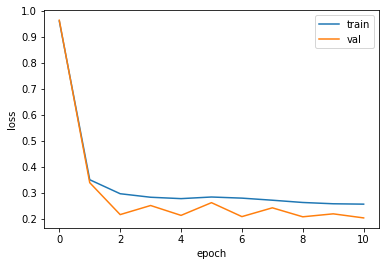

In [61]:
ss_utils.plot_train_and_val_using_mpl(out['train_loss_list'], out['val_lost_list'])
ss_utils.plot_train_and_val_using_altair(out['train_loss_list'], out['val_lost_list'])

In [ ]:
!git clone https://github.com/MolecularAI/pysmilesutils.git
% cd pysmilesutils
!pip install .

Cloning into 'pysmilesutils'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 88 (delta 32), reused 76 (delta 24), pack-reused 0
Unpacking objects: 100% (88/88), done.
/content/pysmilesutils
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/pysmilesutils
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for PySMILESutils: filename=PySMILESutils-1.1.0-py3-none-any.whl size=21206 sha256=9abd657c1700af8eaf1acc41f08e5a4f303311aa636d101f7b0130f5c1315ac9
  Stored in di

In [ ]:
import pickle
from pysmilesutils.tokenize import *
from pysmilesutils.analyze import analyze_smiles_tokens

In [ ]:
smiles_list_all = whole_df['Drug'].tolist()
len(smiles_list_all)

640

In [ ]:
atom_tokenizer = SMILESAtomTokenizer(smiles=smiles_list_all)

In [ ]:
atom_tokenizer(smiles_list_all), len(atom_tokenizer(smiles_list_all)[0])   #len(test_1_s) = 115

In [ ]:
print("Vocabulary dictionary:", atom_tokenizer.vocabulary)

Vocabulary dictionary: {' ': 0, '^': 1, '&': 2, '?': 3, 'O': 4, 'C': 5, '(': 6, 'S': 7, ')': 8, '[': 9, 'N': 10, '+': 11, ']': 12, 'c': 13, '1': 14, 'n': 15, '2': 16, '@': 17, 'H': 18, '=': 19, '#': 20, '3': 21, 's': 22, '/': 23, '\\': 24, '-': 25, '4': 26, '5': 27, '6': 28, '7': 29, '8': 30, '9': 31, 'P': 32, 'Cl': 33, 'o': 34, 'F': 35, 'Br': 36, 'Au': 37, 'I': 38, '.': 39}


In [ ]:
max_len_1 = 0
for i in smiles_list_all:
  if len(i) > max_len_1:
    max_len_1 = len(i)
print(max_len_1)

193


In [62]:
# Comparing against DeepPurpose
drug_encoding_name = 'MPNN' #'Transformer'   'MPNN'
train_gnn, val_gnn, test_gnn = utils.data_process(X_drug = X,
                                      y = y, 
                                      drug_encoding = drug_encoding_name,
                                      # target_encoding = drug_encoding_name,
                                      random_seed = 'TDC')

Drug Property Prediction Mode...
in total: 578 drugs
encoding drug...
unique drugs: 578
Done.


In [63]:
train_gnn.head()

,SMILES,Label,drug_encoding
0,CC(=O)Nc1ccccc1,1,"[[[tensor(1.), tensor(0.), tensor(0.), tensor(..."
1,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1,"[[[tensor(1.), tensor(0.), tensor(0.), tensor(..."
2,C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H...,1,"[[[tensor(1.), tensor(0.), tensor(0.), tensor(..."
3,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C,1,"[[[tensor(1.), tensor(0.), tensor(0.), tensor(..."
4,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...,1,"[[[tensor(1.), tensor(0.), tensor(0.), tensor(..."


In [64]:
config_gnn = utils.generate_config(drug_encoding = drug_encoding_name, 
                         train_epoch = 3, 
                         LR = 0.001, 
                         batch_size = 128,
                         mpnn_hidden_size = 32,
                         mpnn_depth = 2
                        )

In [65]:
model_gnn = CompoundPred.model_initialize(**config_gnn)
model_gnn

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69111. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.57422 , AUPRC: 0.92306 , F1: 0.93577
Training at Epoch 2 iteration 0 with loss 0.36451. Total time 0.0 hours
Validation at Epoch 2 , AUROC: 0.42296 , AUPRC: 0.84029 , F1: 0.93577
Training at Epoch 3 iteration 0 with loss 0.43464. Total time 0.0 hours
Validation at Epoch 3 , AUROC: 0.44257 , AUPRC: 0.86660 , F1: 0.93577
--- Go for Testing ---
Testing AUROC: 0.41320132013201316 , AUPRC: 0.851233385686426 , F1: 0.9308755760368664
--- Training Finished ---


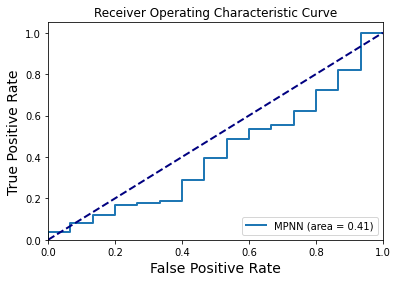

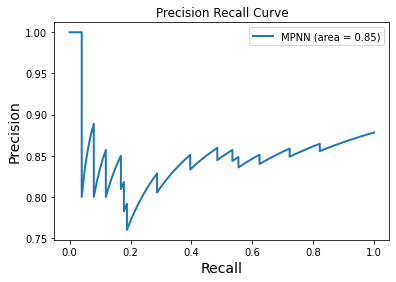

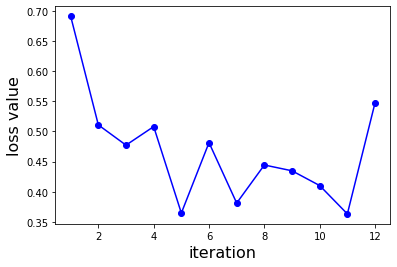

In [66]:
model_gnn.train(train_gnn, val_gnn, test_gnn)

In [67]:
train.head(2)

,SMILES,Label,drug_encoding
0,CC(=O)Nc1ccccc1,1,"([184, 201, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1,"([184, 1000, 22, 763, 1049, 640, 0, 0, 0, 0, 0..."


In [69]:
# Training a Tree model
import xgboost as xgb

In [109]:
# creating a variable for the train and test sets
# label = pd.DataFrame(np.random.randint(2, size=4))
# xgb_test = xgb.DMatrix(label, label)
# xgb_train = xgb.DMatrix(np.array([train['drug_encoding'].tolist()]), np.array([train['Label'].tolist()]))
xgb_test = xgb.DMatrix(test.iloc[:, 1:2], test.iloc[:, 1:2])

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary = True)

In [127]:
cv.fit(whole_df['Drug'])

CountVectorizer(binary=True)

In [128]:
train_x = cv.transform(train['SMILES'])
test_x = cv.transform(test['SMILES'])

In [129]:
xgb_train = xgb.DMatrix(train_x, train.iloc[:, 1:2])
xgb_test = xgb.DMatrix(test_x, test.iloc[:, 1:2])

In [131]:
param = {'eta': 0.75,
         'max_depth': 50,
         'objective': 'binary:logitraw'}
xgb_model = xgb.train(param, xgb_train, num_boost_round = 30)

In [133]:
y_pred = xgb_model.predict(xgb_test)
y_pred = np.where(np.array(y_pred) > 0.5, 1, 0)

In [138]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, roc_auc_score


In [139]:
print(np.sqrt(mean_squared_error(test['Label'], y_pred)))
print(accuracy_score(test['Label'], y_pred))
print(roc_auc_score(test['Label'], y_pred))

0.3474041668898256
0.8793103448275862
0.7036303630363037
